# Data collection

In [ ]:
import pandas as pd

dataset = pd.read_csv('Restaurant_dataset.csv')
dataset

,text,context,target
0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,place
1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,staff
2,"They never brought us complimentary noodles, i...",SERVICE#GENERAL,NaN
3,The food was lousy - too sweet or too salty an...,FOOD#QUALITY,food
4,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,portions
...,...,...,...
2502,The waitress came to check in on us every few ...,SERVICE#GENERAL,waitress
2503,I couldn't ignore the fact that she reach over...,SERVICE#GENERAL,NaN
2504,She then put the check down without asking if ...,SERVICE#GENERAL,NaN
2505,"I wish I could like this place more, and I wis...",RESTAURANT#GENERAL,place


# Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing links
    text = re.sub(r'http\S+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords and special characters, and filtering by text length
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and len(word) > 2 and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text


# Apply preprocessing to the 'text' column
dataset['preprocessed_text'] = dataset['text'].apply(preprocess_text)
dataset.head(10)

,text,context,target,preprocessed_text
0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,place,judging previous post used good place longer
1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,staff,four arrived noon place empty staff acted like...
2,"They never brought us complimentary noodles, i...",SERVICE#GENERAL,NaN,never brought complimentary noodle ignored rep...
3,The food was lousy - too sweet or too salty an...,FOOD#QUALITY,food,food lousy sweet salty portion tiny
4,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,portions,food lousy sweet salty portion tiny
5,"After all that, they complained to me about th...",SERVICE#GENERAL,NaN,complained small tip
6,Avoid this place!,RESTAURANT#GENERAL,place,avoid place
7,"I have eaten at Saul, many times, the food is ...",FOOD#QUALITY,food,eaten saul many time food always consistently ...
8,Saul is the best restaurant on Smith Street an...,RESTAURANT#GENERAL,Saul,saul best restaurant smith street brooklyn
9,The duck confit is always amazing and the foie...,FOOD#QUALITY,foie gras terrine with figs,duck confit always amazing foie gras terrine f...


In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=f6a0ab81ab7d387e9d0c743be446cc608ca0e845945459a861d6f29b18fd296b
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
import pandas as pd
from afinn import Afinn

# Initialize Afinn
afinn = Afinn()

# Function to calculate positive score using Afinn
def calculate_positive_score(text):
    return afinn.score(text)

# Function to calculate negative score using Afinn
def calculate_negative_score(text):
    return -afinn.score(text)

# Function to calculate polarity score
def calculate_polarity_score(text):
    return afinn.score(text)

# Function to assign label based on polarity score
def assign_label(polarity_score):
    return 'positive' if polarity_score > 0 else 'negative'

# Apply functions to create new columns
dataset['positive_score'] = dataset['text'].apply(calculate_positive_score)
dataset['negative_score'] = dataset['text'].apply(calculate_negative_score)
dataset['polarity_score'] = dataset['text'].apply(calculate_polarity_score)
dataset['label'] = dataset['polarity_score'].apply(assign_label)

# Display the updated dataset
dataset.head()


,text,context,target,preprocessed_text,positive_score,negative_score,polarity_score,label
0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,place,judging previous post used good place longer,3.0,-3.0,3.0,positive
1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,staff,four arrived noon place empty staff acted like...,-2.0,2.0,-2.0,negative
2,"They never brought us complimentary noodles, i...",SERVICE#GENERAL,NaN,never brought complimentary noodle ignored rep...,-2.0,2.0,-2.0,negative
3,The food was lousy - too sweet or too salty an...,FOOD#QUALITY,food,food lousy sweet salty portion tiny,0.0,-0.0,0.0,negative
4,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,portions,food lousy sweet salty portion tiny,0.0,-0.0,0.0,negative


### context Terms extractions

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

context_terms = []
for review in nlp.pipe(dataset.text):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    context_terms.append(' '.join(chunks))
dataset['context_terms'] = context_terms
dataset.head(10)

,text,context,target,preprocessed_text,positive_score,negative_score,polarity_score,label,context_terms
0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,place,judging previous post used good place longer,3.0,-3.0,3.0,positive,posts place
1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,staff,four arrived noon place empty staff acted like...,-2.0,2.0,-2.0,negative,noon place staff
2,"They never brought us complimentary noodles, i...",SERVICE#GENERAL,NaN,never brought complimentary noodle ignored rep...,-2.0,2.0,-2.0,negative,noodles requests sugar dishes table
3,The food was lousy - too sweet or too salty an...,FOOD#QUALITY,food,food lousy sweet salty portion tiny,0.0,-0.0,0.0,negative,food portions
4,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,portions,food lousy sweet salty portion tiny,0.0,-0.0,0.0,negative,food portions
5,"After all that, they complained to me about th...",SERVICE#GENERAL,NaN,complained small tip,-2.0,2.0,-2.0,negative,tip
6,Avoid this place!,RESTAURANT#GENERAL,place,avoid place,-1.0,1.0,-1.0,negative,place
7,"I have eaten at Saul, many times, the food is ...",FOOD#QUALITY,food,eaten saul many time food always consistently ...,3.0,-3.0,3.0,positive,food
8,Saul is the best restaurant on Smith Street an...,RESTAURANT#GENERAL,Saul,saul best restaurant smith street brooklyn,3.0,-3.0,3.0,positive,restaurant
9,The duck confit is always amazing and the foie...,FOOD#QUALITY,foie gras terrine with figs,duck confit always amazing foie gras terrine f...,4.0,-4.0,4.0,positive,confit terrine figs world


### Label_encoding of context

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(dataset.context)
dummy_category = to_categorical(integer_category)
dummy_category[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Step 2: Build the context Categories Model

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dataset.text)
context_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(dataset.context_terms))
context_tokenized

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation

context_categories_model = Sequential()
context_categories_model.add(Dense(512, input_shape=(6000,), activation='relu'))
context_categories_model.add(Dense(12, activation='softmax'))
context_categories_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(context_tokenized, dummy_category, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

# Train context categories model
context_categories_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 7s 76ms/step - loss: 2.1039 - accuracy: 0.3666
Epoch 2/10
63/63 [==============================] - 4s 64ms/step - loss: 1.5648 - accuracy: 0.4958
Epoch 3/10
63/63 [==============================] - 4s 66ms/step - loss: 1.2889 - accuracy: 0.5850
Epoch 4/10
63/63 [==============================] - 5s 72ms/step - loss: 1.1080 - accuracy: 0.6424
Epoch 5/10
63/63 [==============================] - 4s 68ms/step - loss: 0.9811 - accuracy: 0.6688
Epoch 6/10
63/63 [==============================] - 4s 71ms/step - loss: 0.8968 - accuracy: 0.6853
Epoch 7/10
63/63 [==============================] - 5s 84ms/step - loss: 0.8390 - accuracy: 0.6893
Epoch 8/10
63/63 [==============================] - 4s 61ms/step - loss: 0.7970 - accuracy: 0.6868
Epoch 9/10
63/63 [==============================] - 4s 65ms/step - loss: 0.7698 - accuracy: 0.6858
Epoch 10/10
63/63 [==============================] - 5s 79ms/step - loss: 0.7523 - accuracy: 0.6878


In [ ]:
# Evaluate context categories model
context_categories_predictions = context_categories_model.predict(X_test)
context_categories_predictions = np.argmax(context_categories_predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

16/16 [==============================] - 0s 8ms/step


In [ ]:
context_accuracy = accuracy_score(y_test_labels, context_categories_predictions)
context_f1 = f1_score(y_test_labels, context_categories_predictions, average='weighted')
context_precision = precision_score(y_test_labels, context_categories_predictions, average='weighted')
context_confusion_matrix = confusion_matrix(y_test_labels, context_categories_predictions)

print("context Categories Model Metrics:")
print("Confusion Matrix:")
print(context_confusion_matrix)

context Categories Model Metrics:
Confusion Matrix:
[[20  0  1  1  0  5  0  1 12  3  0  7]
 [ 0  0  3  1  1  0  0  0  0  0  0  0]
 [ 3  0  3  0  0  2  0  0  3  0  0  0]
 [ 1  0  0  2  0  3  0  0  0  0  0  1]
 [ 0  0  0  0  1  7  1  0  2  0  0  1]
 [11  0  1  0  4 97 18  2 26  3  2 23]
 [ 0  0  0  0  0 20  5  0  3  0  0  4]
 [ 1  0  0  1  0  0  0  0  2  0  1  1]
 [ 2  0  0  0  1  7  1  0 44  0  3  5]
 [ 1  0  0  0  0  1  0  0  6  4  0  6]
 [ 3  0  0  0  0  2  0  0  5  2  1  3]
 [ 9  0  1  1  0 16  1  1 11  4  1 50]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


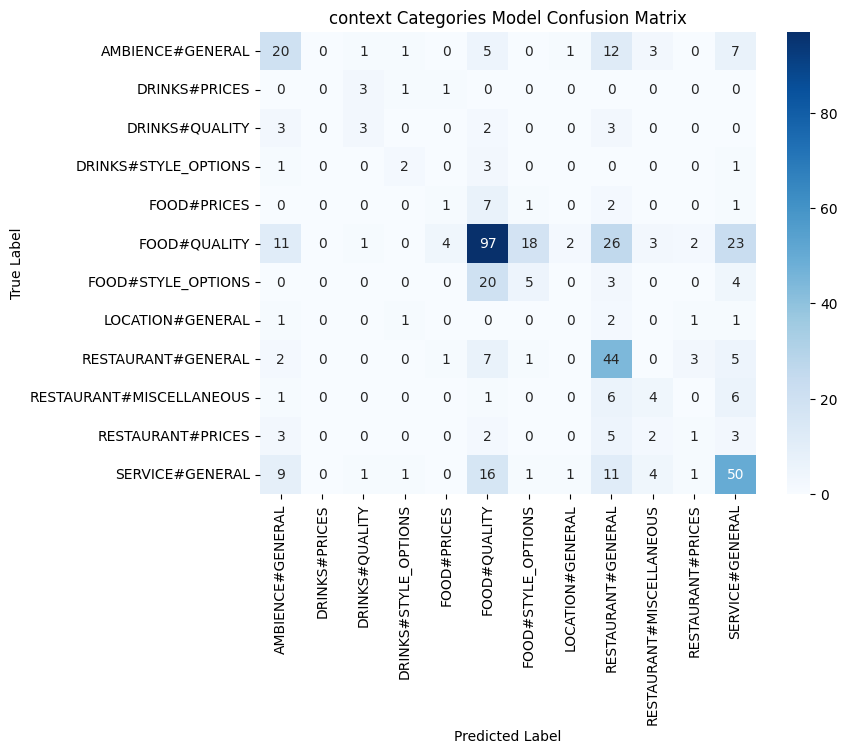

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for context categories model
plt.figure(figsize=(8, 6))
sns.heatmap(context_confusion_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("context Categories Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
import numpy as np

new_review = "This italian place is nice and cosy"

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_context_terms = ' '.join(chunks)
new_review_context_tokenized = tokenizer.texts_to_matrix([new_review_context_terms])

predicted_probabilities = context_categories_model.predict(new_review_context_tokenized)
predicted_class_index = np.argmax(predicted_probabilities)
new_review_category = label_encoder.inverse_transform([predicted_class_index])[0]
print(new_review_category)


1/1 [==============================] - 0s 51ms/step
RESTAURANT#GENERAL


## Step 3: Get the Sentiment Terms

In [ ]:
sentiment_terms = []
for review in nlp.pipe(dataset['text']):
        if review.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('')
dataset['sentiment_terms'] = sentiment_terms
dataset.head(10)

<ipython-input-21-7d30e6c57131>:3: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if review.is_parsed:


,text,context,target,preprocessed_text,positive_score,negative_score,polarity_score,label,context_terms,sentiment_terms
0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,place,judging previous post used good place longer,3.0,-3.0,3.0,positive,posts place,judge previous good
1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,staff,four arrived noon place empty staff acted like...,-2.0,2.0,-2.0,negative,noon place staff,arrive act impose rude
2,"They never brought us complimentary noodles, i...",SERVICE#GENERAL,NaN,never brought complimentary noodle ignored rep...,-2.0,2.0,-2.0,negative,noodles requests sugar dishes table,bring complimentary ignore repeat throw
3,The food was lousy - too sweet or too salty an...,FOOD#QUALITY,food,food lousy sweet salty portion tiny,0.0,-0.0,0.0,negative,food portions,lousy sweet salty tiny
4,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,portions,food lousy sweet salty portion tiny,0.0,-0.0,0.0,negative,food portions,lousy sweet salty tiny
5,"After all that, they complained to me about th...",SERVICE#GENERAL,NaN,complained small tip,-2.0,2.0,-2.0,negative,tip,complain small
6,Avoid this place!,RESTAURANT#GENERAL,place,avoid place,-1.0,1.0,-1.0,negative,place,avoid
7,"I have eaten at Saul, many times, the food is ...",FOOD#QUALITY,food,eaten saul many time food always consistently ...,3.0,-3.0,3.0,positive,food,eat good
8,Saul is the best restaurant on Smith Street an...,RESTAURANT#GENERAL,Saul,saul best restaurant smith street brooklyn,3.0,-3.0,3.0,positive,restaurant,good
9,The duck confit is always amazing and the foie...,FOOD#QUALITY,foie gras terrine with figs,duck confit always amazing foie gras terrine f...,4.0,-4.0,4.0,positive,confit terrine figs world,amazing


## Step 4: Build the Sentiment Model

In [ ]:
sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape=(6000,), activation='relu'))
sentiment_model.add(Dense(2, activation='softmax'))
sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
sentiment_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(dataset.sentiment_terms))

In [ ]:
label_encoder_2 = LabelEncoder()
integer_sentiment = label_encoder_2.fit_transform(dataset.label)
dummy_sentiment = to_categorical(integer_sentiment)

In [ ]:
# Split the dataset for sentiment analysis model
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(sentiment_tokenized, dummy_sentiment, test_size=0.2, random_state=42)

# Train sentiment analysis model
sentiment_model.fit(X_train_sentiment, y_train_sentiment, epochs=5, verbose=1)


Epoch 1/5
63/63 [==============================] - 4s 49ms/step - loss: 0.5260 - accuracy: 0.6948
Epoch 2/5
63/63 [==============================] - 2s 37ms/step - loss: 0.2427 - accuracy: 0.9212
Epoch 3/5
63/63 [==============================] - 2s 36ms/step - loss: 0.1492 - accuracy: 0.9456
Epoch 4/5
63/63 [==============================] - 2s 36ms/step - loss: 0.1150 - accuracy: 0.9616
Epoch 5/5
63/63 [==============================] - 2s 37ms/step - loss: 0.0981 - accuracy: 0.9676


In [ ]:

# Evaluate sentiment analysis model
sentiment_predictions = sentiment_model.predict(X_test_sentiment)
sentiment_predictions = np.argmax(sentiment_predictions, axis=1)
y_test_sentiment_labels = np.argmax(y_test_sentiment, axis=1)

16/16 [==============================] - 0s 8ms/step


In [ ]:
sentiment_accuracy = accuracy_score(y_test_sentiment_labels, sentiment_predictions)
sentiment_f1 = f1_score(y_test_sentiment_labels, sentiment_predictions, average='weighted')
sentiment_precision = precision_score(y_test_sentiment_labels, sentiment_predictions, average='weighted')
sentiment_confusion_matrix = confusion_matrix(y_test_sentiment_labels, sentiment_predictions)

print("\nSentiment Analysis Model Metrics:")
print("Accuracy:", sentiment_accuracy)
print("F1-score:", sentiment_f1)
print("Precision:", sentiment_precision)
print("Confusion Matrix:")
print(sentiment_confusion_matrix)


Sentiment Analysis Model Metrics:
Accuracy: 0.8924302788844621
F1-score: 0.8926981938548106
Precision: 0.8930863695182266
Confusion Matrix:
[[152  25]
 [ 29 296]]


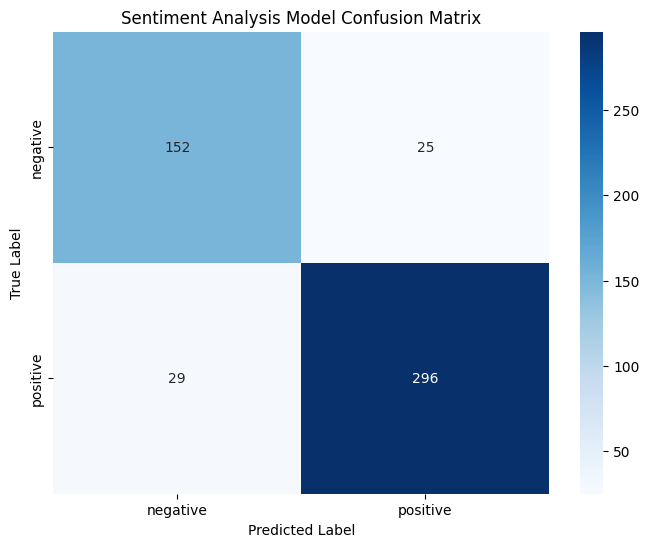

In [ ]:
# Plot confusion matrix for sentiment analysis model
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_confusion_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder_2.classes_, yticklabels=label_encoder_2.classes_)
plt.title("Sentiment Analysis Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

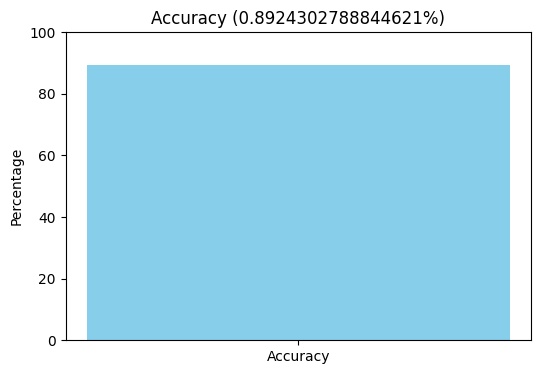

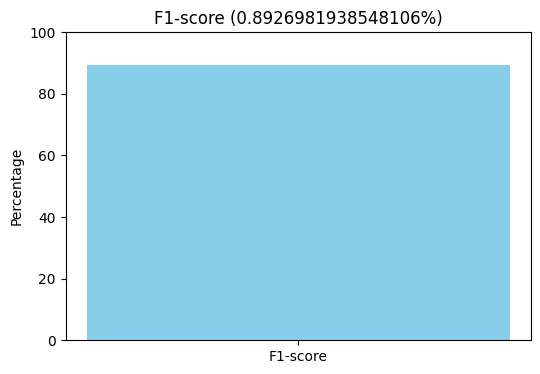

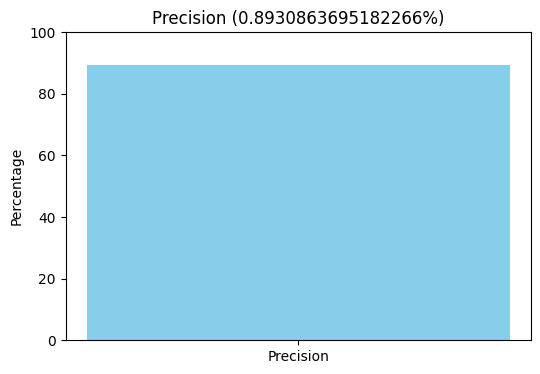

In [ ]:
import matplotlib.pyplot as plt

# Calculate metrics
metrics = {
    "Accuracy": sentiment_accuracy,
    "F1-score": sentiment_f1,
    "Precision": sentiment_precision
}

# Create separate bar graphs for each metric
for metric, value in metrics.items():
    plt.figure(figsize=(6, 4))
    plt.bar(metric, value * 100, color='skyblue')
    plt.title(f"{metric} ({value}%)")
    plt.ylim(0, 100)
    plt.ylabel("Percentage")
    plt.show()


In [ ]:
import numpy as np

new_review = "This italian place is nice and cosy"

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_context_terms = ' '.join(chunks)
new_review_context_tokenized = tokenizer.texts_to_matrix([new_review_context_terms])

predicted_probabilities = sentiment_model.predict(new_review_context_tokenized)
predicted_class_index = np.argmax(predicted_probabilities)
new_review_category = label_encoder_2.inverse_transform([predicted_class_index])[0]
print(new_review_category)


1/1 [==============================] - 0s 48ms/step
negative


In [ ]:
import numpy as np

test_reviews = [
    "Good, fast service.",
    "The hostess was very pleasant.",
    "The bread was stale, the salad was overpriced and empty.",
    "The food we ordered was excellent, although I wouldn't say the margaritas were anything to write home about.",
    "This place has totally weird decor, stairs going up with mirrored walls - I am surprised how no one yet broke their head or fall off the stairs"
]

# context preprocessing
test_reviews = [review.lower() for review in test_reviews]
test_context_terms = []
for review in nlp.pipe(test_reviews):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    test_context_terms.append(' '.join(chunks))
test_context_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_context_terms))

# Sentiment preprocessing
test_sentiment_terms = []
for review in nlp.pipe(test_reviews):
    test_sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
test_sentiment_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_sentiment_terms))

# Models output
predicted_context_categories = context_categories_model.predict(test_context_terms)
predicted_sentiments = sentiment_model.predict(test_sentiment_terms)

predicted_context_categories_indices = np.argmax(predicted_context_categories, axis=1)
predicted_sentiments_indices = np.argmax(predicted_sentiments, axis=1)

test_context_categories = label_encoder.inverse_transform(predicted_context_categories_indices)
test_sentiment = label_encoder_2.inverse_transform(predicted_sentiments_indices)

for i in range(5):
    print("Review " + str(i+1) + " is expressing a " + test_sentiment[i] + " opinion about " + test_context_categories[i])


1/1 [==============================] - 0s 23ms/step
Review 1 is expressing a positive opinion about SERVICE#GENERAL
Review 2 is expressing a positive opinion about SERVICE#GENERAL
Review 3 is expressing a negative opinion about FOOD#QUALITY
Review 4 is expressing a positive opinion about DRINKS#QUALITY
Review 5 is expressing a negative opinion about AMBIENCE#GENERAL


In [ ]:
def predict(text_review):
  # context preprocessing
    review = text_review.lower()
    chunks = [(chunk.root.text) for chunk in nlp(review).noun_chunks if chunk.root.pos_ == 'NOUN']
    context_terms = ' '.join(chunks)
    context_terms = pd.DataFrame(tokenizer.texts_to_matrix([context_terms]))

    # Sentiment preprocessing
    sentiment_terms = ' '.join([token.lemma_ for token in nlp(review) if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))])
    sentiment_terms = pd.DataFrame(tokenizer.texts_to_matrix([sentiment_terms]))

    # Models output
    predicted_context_categories = context_categories_model.predict(context_terms)
    predicted_sentiments = sentiment_model.predict(sentiment_terms)

    predicted_context_category_index = np.argmax(predicted_context_categories)
    predicted_sentiment_index = np.argmax(predicted_sentiments)

    test_context_category = label_encoder.inverse_transform([predicted_context_category_index])[0]
    test_sentiment = label_encoder_2.inverse_transform([predicted_sentiment_index])[0]

    print("The review is expressing a", test_sentiment, "opinion about", test_context_category)

In [ ]:
text_review = input("Enter your review: ")
predict(text_review)


Enter your review: Food is bad, served very late 
1/1 [==============================] - 0s 31ms/step
The review is expressing a negative opinion about FOOD#QUALITY


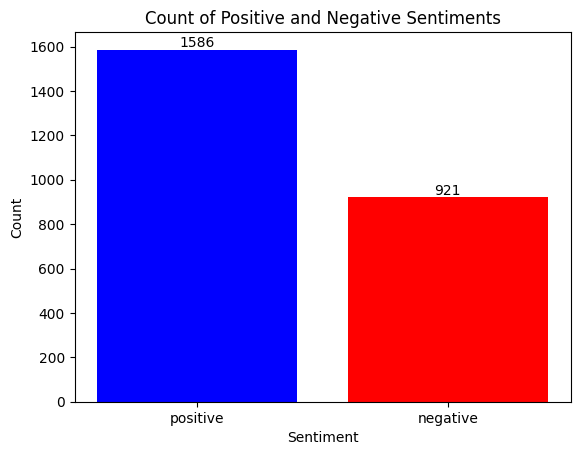

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataframe with a column containing "positive" and "negative" values
# Assuming you have a dataframe named 'dataset' with a column named 'label'

# Count occurrences of each value in the column
value_counts = dataset['label'].value_counts()

# Plot the counts as a bar plot
bars = plt.bar(value_counts.index, value_counts.values, color=['blue', 'red'])

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Sentiments')
plt.show()


Epoch 1/10
63/63 [==============================] - 2s 37ms/step - loss: 0.7348 - accuracy: 0.6903
Epoch 2/10
63/63 [==============================] - 2s 36ms/step - loss: 0.7220 - accuracy: 0.6898
Epoch 3/10
63/63 [==============================] - 2s 37ms/step - loss: 0.7110 - accuracy: 0.6868
Epoch 4/10
63/63 [==============================] - 3s 45ms/step - loss: 0.7053 - accuracy: 0.6838
Epoch 5/10
63/63 [==============================] - 3s 43ms/step - loss: 0.6983 - accuracy: 0.6873
Epoch 6/10
63/63 [==============================] - 3s 45ms/step - loss: 0.6928 - accuracy: 0.6878
Epoch 7/10
63/63 [==============================] - 4s 70ms/step - loss: 0.6847 - accuracy: 0.6988
Epoch 8/10
63/63 [==============================] - 5s 79ms/step - loss: 0.6786 - accuracy: 0.6958
Epoch 9/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6759 - accuracy: 0.6868
Epoch 10/10
63/63 [==============================] - 3s 55ms/step - loss: 0.6716 - accuracy: 0.6953


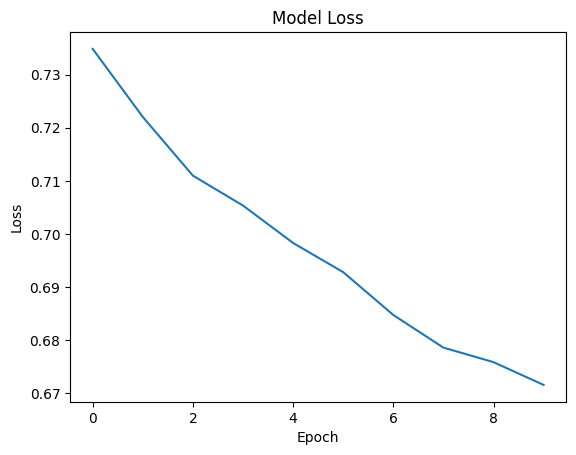

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Train context categories model
history = context_categories_model.fit(X_train, y_train, epochs=10, verbose=1)

# Plot the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Epoch 1/5
63/63 [==============================] - 3s 49ms/step - loss: 0.0885 - accuracy: 0.9706 - val_loss: 0.3273 - val_accuracy: 0.8884
Epoch 2/5
63/63 [==============================] - 3s 45ms/step - loss: 0.0852 - accuracy: 0.9696 - val_loss: 0.3445 - val_accuracy: 0.8884
Epoch 3/5
63/63 [==============================] - 2s 38ms/step - loss: 0.0790 - accuracy: 0.9731 - val_loss: 0.3653 - val_accuracy: 0.8825
Epoch 4/5
63/63 [==============================] - 2s 39ms/step - loss: 0.0764 - accuracy: 0.9711 - val_loss: 0.3764 - val_accuracy: 0.8884
Epoch 5/5
63/63 [==============================] - 2s 39ms/step - loss: 0.0727 - accuracy: 0.9726 - val_loss: 0.3930 - val_accuracy: 0.8825


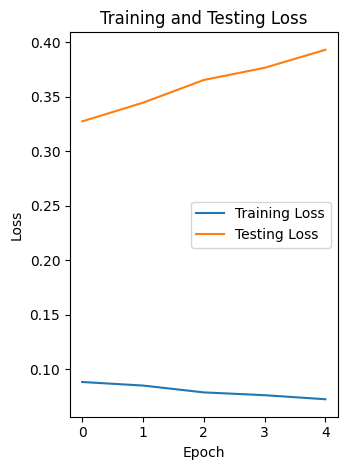

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Train sentiment analysis model
history_sentiment = sentiment_model.fit(X_train_sentiment, y_train_sentiment, validation_data=(X_test_sentiment, y_test_sentiment), epochs=5, verbose=1)

# Extract training and testing accuracy
training_accuracy = history_sentiment.history['accuracy']
testing_accuracy = history_sentiment.history['val_accuracy']

# Extract training and testing loss
training_loss = history_sentiment.history['loss']
testing_loss = history_sentiment.history['val_loss']

# Plot training and testing accuracy


# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()


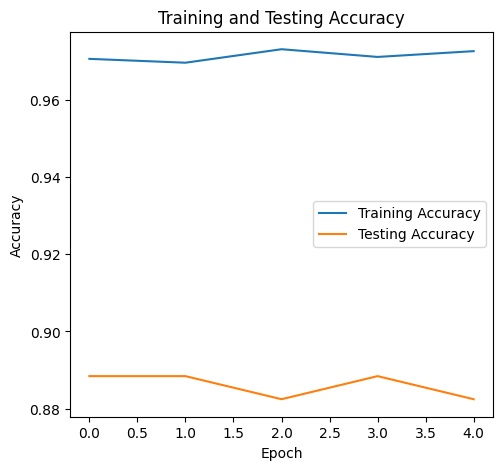

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()